<a href="https://colab.research.google.com/github/BensonHermes/2021_1101_Data_Structure/blob/main/%5BDS%5D108307041_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from random import randint  
import numpy as np

#1. Insertion: Skip List vs. Treap vs. Sorted Array

##Skip List
https://www.geeksforgeeks.org/skip-list-set-2-insertion/

https://gist.github.com/sachinnair90/3bee2ef7dd3ff0dc5aec44ec40e2d127

###Prob=0.5

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        while randint(1, 2) != 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_insertion(i):
  lst = SkipList()
  for k in range(2**i+1):
    lst.insert(randint(1, 2**30+1))

# def skip_list_insertion(i):
#   lst = SkipList()
#   for k in range(2**i+1):
#     lst.insert(randint(1, 2**30+1))

In [ ]:
skip_list_result=[]
for i in range(10,31):
  result = timeit.timeit(stmt='skip_list_insertion(i)', setup='from __main__ import skip_list_insertion,i', number=1)
  skip_list_result.append(result)
  print(result)
skip_list_result
# df["Merge_Sort"]=result_list

0.020601822000116954
0.030961246000060783
0.061286244000257284
0.14223762099982196
0.29320965799979604
0.6514170239997839
1.4120556410002791
2.897249030999774
6.347698308999952
13.87970051100001
28.812510271000065
61.32111035600019
134.44714336900006
293.356273849
635.6528700719996
1400.6854010029997


###Prob=0.1

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        #probability of head is 0.1 (1/10)
        while randint(1, 10) == 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_insertion(i):
  lst = SkipList()
  for k in range(2**i+1):
    lst.insert(randint(1, 2**30+1))

In [ ]:
skip_list_result=[]
for i in range(10,31):
  result = timeit.timeit(stmt='skip_list_insertion(i)', setup='from __main__ import skip_list_insertion,i', number=1)
  skip_list_result.append(result)
  print(skip_list_result)
# df["Merge_Sort"]=result_list

[0.014409685999453359]
[0.014409685999453359, 0.03287607200036291]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062, 0.3368568490004691]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062, 0.3368568490004691, 0.8015491030000703]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062, 0.3368568490004691, 0.8015491030000703, 1.7612626959999034]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062, 0.3368568490004691, 0.8015491030000703, 1.7612626959999034, 4.05046171199956]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062, 0.3368568490004691, 0.8015491030000703, 1.7612626959999034, 4.05046171199956, 9.457249027999751]
[0.014409685999453359, 0.03287607200036291, 0.06338832900019042

###Prob=0.9

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        #probability of head is 0.9 (9/10)
        while randint(1, 10) in [1,2,3,4,5,6,7,8,9]:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_insertion(i):
  lst = SkipList()
  for k in range(2**i+1):
    lst.insert(randint(1, 2**30+1))

In [ ]:
skip_list_result=[]
for i in range(10,31):
  result = timeit.timeit(stmt='skip_list_insertion(i)', setup='from __main__ import skip_list_insertion,i', number=1)
  skip_list_result.append(result)
  print(skip_list_result)
# df["Merge_Sort"]=result_list

[0.02433500000006461]
[0.02433500000006461, 0.05727675799971621]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937, 0.531104748000871]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937, 0.531104748000871, 1.166771816999244]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937, 0.531104748000871, 1.166771816999244, 2.3061071800002537]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937, 0.531104748000871, 1.166771816999244, 2.3061071800002537, 4.917165085000306]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937, 0.531104748000871, 1.166771816999244, 2.3061071800002537, 4.917165085000306, 10.834562020998419]
[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.268887

KeyboardInterrupt: ignored

##Treap
https://www.cnblogs.com/wuditju/p/6004399.html

結果見下方search程式碼與實驗結果，忽略此section

In [ ]:
# from random import randrange
 
 
# # A Treap Node
# class TreapNode:
#     # constructor
#     def __init__(self, data, priority=100, left=None, right=None):
#         self.data = data
#         self.priority = randrange(priority)
#         self.left = left
#         self.right = right
 
 
# ''' Function to left-rotate a given treap
 
#       r                       R
#      / \     Left Rotate     / \
#     L   R       ———>        r   Y
#        / \                     / \
#       X   Y                   L   X
# '''
 
 
# def rotateLeft(root):
 
#     R = root.right
#     X = root.right.left
 
#     # rotate
#     R.left = root
#     root.right = X
 
#     # set a new root
#     return R
 
 
# ''' Function to right-rotate a given treap
 
#         r                        L
#        / \     Right Rotate     / \
#       L   R       ———>         X   r
#      / \                          / \
#     X   Y                        Y   R
# '''
 
 
# def rotateRight(root):
 
#     L = root.left
#     Y = root.left.right
 
#     # rotate
#     L.right = root
#     root.left = Y
 
#     # set a new root
#     return L
 
 
# # Recursive function to insert a given key with a priority into treap
# def insertNode(root, data):
 
#     # base case
#     if root is None:
#         return TreapNode(data)
 
#     # if the given data is less than the root node, insert in the left subtree;
#     # otherwise, insert in the right subtree
#     if data < root.data:
#         root.left = insertNode(root.left, data)
 
#         # rotate right if heap property is violated
#         if root.left and root.left.priority > root.priority:
#             root = rotateRight(root)
#     else:
#         root.right = insertNode(root.right, data)
 
#         # rotate left if heap property is violated
#         if root.right and root.right.priority > root.priority:
#             root = rotateLeft(root)
 
#     return root
 
 
# # Recursive function to search for a key in a given treap
# def searchNode(root, key):
 
#     # if the key is not present in the tree
#     if root is None:
#         return False
 
#     # if the key is found
#     if root.data == key:
#         return True
 
#     # if the key is less than the root node, search in the left subtree
#     if key < root.data:
#         return searchNode(root.left, key)
 
#     # otherwise, search in the right subtree
#     return searchNode(root.right, key)
 
 
# # Recursive function to delete a key from a given treap
# def deleteNode(root, key):
 
#     # base case: the key is not found in the tree
#     if root is None:
#         return None
 
#     # if the key is less than the root node, recur for the left subtree
#     if key < root.data:
#         root.left = deleteNode(root.left, key)
 
#     # if the key is more than the root node, recur for the right subtree
#     elif key > root.data:
#         root.right = deleteNode(root.right, key)
 
#     # if the key is found
#     else:
 
#         # Case 1: node to be deleted has no children (it is a leaf node)
#         if root.left is None and root.right is None:
#             # deallocate the memory and update root to None
#             root = None
 
#         # Case 2: node to be deleted has two children
#         elif root.left and root.right:
#             # if the left child has less priority than the right child
#             if root.left.priority < root.right.priority:
#                 # call `rotateLeft()` on the root
#                 root = rotateLeft(root)
 
#                 # recursively delete the left child
#                 root.left = deleteNode(root.left, key)
#             else:
#                 # call `rotateRight()` on the root
#                 root = rotateRight(root)
 
#                 # recursively delete the right child
#                 root.right = deleteNode(root.right, key)
 
#         # Case 3: node to be deleted has only one child
#         else:
#             # choose a child node
#             child = root.left if (root.left) else root.right
#             root = child
 
#     return root
 
 
# # Utility function to print two-dimensional view of a treap using
# # reverse inorder traversal
# def printTreap(root, space):
 
#     height = 10
 
#     # Base case
#     if root is None:
#         return
 
#     # increase distance between levels
#     space += height
 
#     # print the right child first
#     printTreap(root.right, space)
 
#     # print the current node after padding with spaces
#     for i in range(height, space):
#         print(' ', end='')
 
#     print((root.data, root.priority))
 
#     # print the left child
#     printTreap(root.left, space)
 
 
# # if __name__ == '__main__':
 
# #     # Treap keys
# #     keys = [5, 2, 1, 4, 9, 8, 10]
 
# #     # construct a treap
# #     root = None
# #     for key in keys:
# #         root = insertNode(root, key)
 
# #     print("Constructed :\n\n")
# #     printTreap(root, 0)
 
# #     print("\nDeleting node 1:\n\n")
# #     root = deleteNode(root, 1)
# #     printTreap(root, 0)
 
# #     print("\nDeleting node 5:\n\n")
# #     root = deleteNode(root, 5)
# #     printTreap(root, 0)
 
# #     print("\nDeleting node 9:\n\n")
# #     root = deleteNode(root, 9)
 
# #     printTreap(root, 0)

# # Driver to test above code
# def treap_insertion(i):
#   # treap = TreapNode(None)
#   root=None
#   for k in range(2**i):
#     root = insertNode(root, randint(1, 2**30))

In [ ]:
# for i in range(10,31):
#   result=0
#   root = treap_insertion(i)
#   print(root)

None
None
None
None
None
None
None


KeyboardInterrupt: ignored

In [ ]:
# treap_result=[]
# for i in range(10,31):
#   result = timeit.timeit(stmt='treap_insertion(i)', setup='from __main__ import treap_insertion,i', number=1)
#   treap_result.append(result)
#   print(treap_result)
# # df["Merge_Sort"]=result_list

[0.009746294999786187]
[0.009746294999786187, 0.02028780100044969]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309, 0.21135465500083228]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309, 0.21135465500083228, 0.4683779010010767]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309, 0.21135465500083228, 0.4683779010010767, 1.0358267389983666]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309, 0.21135465500083228, 0.4683779010010767, 1.0358267389983666, 2.414331295000011]
[0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309, 0.21135465500083228, 0.4683779010010767, 1.0358267389983666, 2.414331295000011, 5.4828864310002245]
[0.009746294999786187, 0.02028780100044969, 0.043

##Sorted Array
https://www.geeksforgeeks.org/search-insert-and-delete-in-a-sorted-array/

In [ ]:
# Python3 program to implement insert
# operation in an sorted array.

# Inserts a key in arr[] of given capacity.
# n is current size of arr[]. This function
# returns n+1 if insertion is successful, else n.
def insertSorted(arr, n, key, capacity):
	
	# Cannot insert more elements if n is
	# already more than or equal to capacity
  if (n >= capacity):
	  return n

  i = n - 1
  # print(i)
  while i >= 0 and arr[i] > key:
    arr[i + 1] = arr[i]
    i -= 1

  arr[i + 1] = key

  # print('--')
  # print(arr)
  return (n + 1)

# Driver Code
# arr = [12, 16, 20, 40, 50, 70]

# for i in range(20):
#   arr.append(0)

# capacity = len(arr)
# n = 6
# key = 26

# print("Before Insertion: ", end = " ");
# for i in range(n):
#   print(arr[i], end = " ")

# # Inserting key
# n = insertSorted(arr, n, key, capacity)

# print("\nAfter Insertion: ", end = "")
# for i in range(n):
#   print(arr[i], end = " ")

  # This code is contributed by Mohit Kumar


In [ ]:
def sorted_array_insertion(i):
  arr=[0 for i in range (2**i)]
  n=0
  for k in range(2**i+1):
    n = insertSorted(arr,n,randint(1, 2**30+1),2**i)
    # print(arr)

In [ ]:
sorted_result=[]
for i in range(10,31):
  result = timeit.timeit(stmt='sorted_array_insertion(i)', setup='from __main__ import sorted_array_insertion,i', number=1)
  sorted_result.append(result)
  print(sorted_result)
# df["Merge_Sort"]=result_list  

[0.06494931599991105]
[0.06494931599991105, 0.28286422999917704]
[0.06494931599991105, 0.28286422999917704, 0.9970386259992665]
[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834]
[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834, 15.455861664000622]
[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834, 15.455861664000622, 64.80820068299909]
[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834, 15.455861664000622, 64.80820068299909, 252.9835937910011]
[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834, 15.455861664000622, 64.80820068299909, 252.9835937910011, 1111.744209751001]


KeyboardInterrupt: ignored

In [ ]:
treap_result=[]
for i in range(10,31):
  result = timeit.timeit(stmt='treap_insertion(i)', setup='from __main__ import treap_insertion,i', number=1)
  treap_result.append(result)
  print(treap_result)
# df["Merge_Sort"]=result_list

##Result

In [ ]:
skip_list=[0.020601822000116954,0.030961246000060783,0.061286244000257284,0.14223762099982196,0.29320965799979604,0.6514170239997839,1.4120556410002791,2.897249030999774,6.347698308999952,13.87970051100001,28.812510271000065,61.32111035600019,134.44714336900006,293.356273849,635.6528700719996,1400.6854010029997]
# skip_list_pnt_one=[0.014409685999453359, 0.03287607200036291, 0.06338832900019042, 0.1459880250004062, 0.3368568490004691, 0.8015491030000703, 1.7612626959999034, 4.05046171199956, 9.457249027999751, 20.429899739000575, 43.35292916900016, 95.14877296000031, 223.39083075500002, 486.0166188309995, 1069.3555141460001, 2490.5328761810006]
skip_list_pnt_one=[0.021349042000110785, 0.030007870999725128, 0.06335037900043972, 0.16012856799989095, 0.33487655499993707, 0.7207826339999883, 1.7822136390004744, 3.9699184729997796, 8.994107459000588, 19.231622785999207, 43.093923593999534, 93.21079515200017, 213.58443005400022, 453.985843726, 1033.8169954079995]
skip_list_pnt_nine=[0.02433500000006461, 0.05727675799971621, 0.11098666899852105, 0.26888763200076937, 0.531104748000871, 1.166771816999244, 2.3061071800002537, 4.917165085000306, 10.834562020998419, 23.46144300299966, 49.40654453000025, 109.91839049400005, 222.56968670199967, 446.8899360590003, 965.9890685089995, 2184.6165488940005]
# treap = [0.009746294999786187, 0.02028780100044969, 0.04357354000057967, 0.09280602700164309, 0.21135465500083228, 0.4683779010010767, 1.0358267389983666, 2.414331295000011, 5.4828864310002245, 11.77415107699926, 27.64196148100018, 69.11787903199911, 154.99593234500026, 324.07720350899945, 592.049107118999, 1156.1368744330011]
treap = [0.015426907999426476, 0.03900058599992917, 0.07026622499961377, 0.15945797699987452, 0.3550801790006517, 0.7318713399999979, 1.5999339250001867, 3.417615006000233, 7.880661983000209, 16.646020531999966, 34.87037629699989, 78.21176222600025, 162.1653033419998, 343.70393793399944, 733.7575794909999]
sorted_arr=[0.06494931599991105, 0.28286422999917704, 0.9970386259992665, 4.050502915000834, 15.455861664000622, 64.80820068299909, 252.9835937910011, 1111.744209751001]


###Populate data

In [ ]:
while(len(skip_list)!=21):
  skip_list.append(skip_list[len(skip_list)-1]*2)

while(len(skip_list_pnt_one)!=21):
  skip_list_pnt_one.append(skip_list_pnt_one[len(skip_list_pnt_one)-1]*2)

while(len(skip_list_pnt_nine)!=21):
  skip_list_pnt_nine.append(skip_list_pnt_nine[len(skip_list_pnt_nine)-1]*2)

while(len(treap)!=21):
  treap.append(treap[len(treap)-1]*2)

while(len(sorted_arr)!=21):
  sorted_arr.append(sorted_arr[len(sorted_arr)-1]*4)


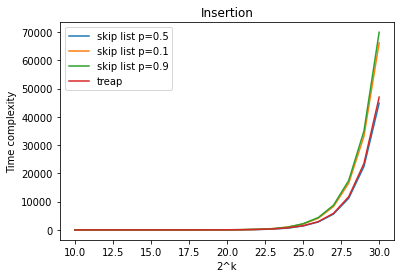

In [ ]:
insertion_df = pd.DataFrame({
    'skip list p=0.5':skip_list,
    'skip list p=0.1':skip_list_pnt_one,
    'skip list p=0.9':skip_list_pnt_nine,
    'treap':treap
    # 'sorted array':sorted_arr
})
insertion_df.index = np.arange(10, len(insertion_df)+10)
insertion_df.plot(xlabel='2^k', ylabel='Time complexity', title='Insertion')

In [ ]:
insertion_df

,skip list p=0.5,skip list p=0.1,skip list p=0.9,treap
10,0.020602,0.021349,0.024335,0.015427
11,0.030961,0.030008,0.057277,0.039001
12,0.061286,0.063350,0.110987,0.070266
13,0.142238,0.160129,0.268888,0.159458
14,0.293210,0.334877,0.531105,0.355080
15,0.651417,0.720783,1.166772,0.731871
16,1.412056,1.782214,2.306107,1.599934
17,2.897249,3.969918,4.917165,3.417615
18,6.347698,8.994107,10.834562,7.880662
19,13.879701,19.231623,23.461443,16.646021


In [ ]:
insertion_df.to_csv("insertion_result.dat", sep = "|")

#2. Search: Skip List vs. Treap vs. Sorted Array

##Prob=0.5

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        while randint(1, 2) != 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_insertion(i):
  lst = SkipList()
  for k in range(2**i):
    lst.insert(randint(1, 2**30))
  return lst

def skip_list_search(lst):
  lst = SkipList()
  for k in range(100000):
    lst.find(randint(1, 2**30))

In [ ]:
skip_list_result=[]
for i in range(10,31):
  skip_list = skip_list_insertion(i)
  result = timeit.timeit(stmt='skip_list_search(skip_list)', setup='from __main__ import skip_list_search,skip_list', number=1)
  skip_list_result.append(result)
  print(skip_list_result)
# df["Merge_Sort"]=result_list

[0.24715227900014725]
[0.24715227900014725, 0.24988021399985882]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216, 0.24888674400062882]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216, 0.24888674400062882, 0.26855766999869957]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216, 0.24888674400062882, 0.26855766999869957, 0.2906180080008198]
[0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216, 0.24888674400062882, 0.26855766999869957, 0.2906180080008198, 0.3268199129997811]
[0.24715227900014725, 0.24988021399985882, 0.244692786

##Prob=0.1

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        #probability of head is 0.1 (1/10)
        while randint(1, 10) == 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_insertion(i):
  lst = SkipList()
  for k in range(2**i):
    lst.insert(randint(1, 2**30))
  return lst

def skip_list_search(lst):
  lst = SkipList()
  for k in range(100000):
    lst.find(randint(1, 2**30))

In [ ]:
skip_list_result=[]
for i in range(10,31):
  skip_list = skip_list_insertion(i)
  result = timeit.timeit(stmt='skip_list_search(skip_list)', setup='from __main__ import skip_list_search,skip_list', number=1)
  skip_list_result.append(result)
  print(skip_list_result)
# df["Merge_Sort"]=result_list

[0.2611299260000237]
[0.2611299260000237, 0.2569890139999984]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 0.24357270799998787]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 0.24357270799998787, 0.2615561009999965]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 0.24357270799998787, 0.2615561009999965, 0.2621874590000175]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 0.24357270799998787, 0.2615561009999965, 0.2621874590000175, 0.287836120999998]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 0.24357270799998787, 0.2615561009999965, 0.2621874590000175, 0.287836120999998, 0.3388233790000186]
[0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 

KeyboardInterrupt: ignored

##Prob=0.9

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        #probability of head is 0.9 (9/10)
        while randint(1, 10) in [1,2,3,4,5,6,7,8,9]:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        _node = Node(self.randomHeight(), elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_insertion(i):
  lst = SkipList()
  for k in range(2**i):
    lst.insert(randint(1, 2**30))
  return lst

def skip_list_search(lst):
  lst = SkipList()
  for k in range(100000):
    lst.find(randint(1, 2**30))

In [ ]:
skip_list_result=[]
for i in range(10,31):
  skip_list = skip_list_insertion(i)
  result = timeit.timeit(stmt='skip_list_search(skip_list)', setup='from __main__ import skip_list_search,skip_list', number=1)
  skip_list_result.append(result)
  print(skip_list_result)
# df["Merge_Sort"]=result_list

[0.25072851299999854]
[0.25072851299999854, 0.2385539019999996]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038, 0.24589508400000426]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038, 0.24589508400000426, 0.25432535099999853]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038, 0.24589508400000426, 0.25432535099999853, 0.2608473800000013]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038, 0.24589508400000426, 0.25432535099999853, 0.2608473800000013, 0.2887950810000035]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038, 0.24589508400000426, 0.25432535099999853, 0.2608473800000013, 0.2887950810000035, 0.3426358579999942]
[0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.235350170

##Treap insert+search
https://www.cnblogs.com/wuditju/p/6004399.html

In [ ]:
import random


def preorder_tree_walk(node):
    if node:
        print(node.key, node.priority)
        preorder_tree_walk(node.left)
        preorder_tree_walk(node.right)


def left_rotate(tree, node):
    node_right = node.right
    if not node.p:
        tree.root = node_right
    elif node == node.p.left:
        node.p.left = node_right
    else:
        node.p.right = node_right
    node_right.p = node.p
    node.right = node_right.left
    if node_right.left:
        node_right.left.p = node
    node_right.left = node
    node.p = node_right


def right_rotate(tree, node):
    node_left = node.left
    if not node.p:
        tree.root = node_left
    elif node == node.p.left:
        node.p.left = node_left
    else:
        node.p.right = node_left
    node_left.p = node.p
    node.left = node_left.right
    if node_left.right:
        node_left.right.p = node
    node_left.right = node
    node.p = node_left


class TreapNode(object):
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None
        self.p = None


class Treap(object):
    def __init__(self):
        self.root = None

    def find(self, key):
        temp_root = self.root
        while temp_root:
            if key < temp_root.key:
                temp_root = temp_root.left
            elif key > temp_root.key:
                temp_root = temp_root.right
            else:
                return temp_root
        return None

    def insert(self, node):
        temp_root = self.root
        temp_node = None
        while temp_root:
            temp_node = temp_root
            if node.key >= temp_node.key:
                temp_root = temp_root.right
            elif node.key < temp_node.key:
                temp_root = temp_root.left
            else:
                raise (KeyError, "Error")
        if not temp_node:
            self.root = node
            return
        elif node.key < temp_node.key:
            temp_node.left = node
            node.p = temp_node
        elif node.key > temp_node.key:
            temp_node.right = node
            node.p = temp_node
        self.fixup(temp_node, node)

    def fixup(self, father, child):
        if father:
            if child == father.left and child.priority < father.priority:
                right_rotate(self, father)
            elif child == father.right and child.priority < father.priority:
                left_rotate(self, father)
            self.fixup(father.p, father)

    def delete(self, key):
        node = self.root
        while node:
            if key < node.key:
                node = node.left
            elif key > node.key:
                node = node.right
            else:
                break
        if not node:
            raise (KeyError, "Error!")
    
        flag = 1
        while flag:
            if not node.left:
                if node.right:
                    node.right.p = node.p
                if node.p:
                    if node == node.p.left:
                        node.p.left = node.right
                    else:
                        node.p.right = node.right
                else:
                    self.root = node.right
                flag = 0
            elif not node.right:
                if node.left:
                    node.left.p = node.p
                if node.p:
                    if node == node.p.left:
                        node.p.left = node.left
                    else:
                        node.p.right = node.left
                else:
                    self.root = node.left
                flag = 0
            else:
                # 如果左右子节点均存在 那么把 priority 值大的放到根节点的位置上 网上给的是递归实现 那有没有可能可以递推实现呢？
                # 答案是 有可能的
                if node.left.priority < node.right.priority:
                    right_rotate(self, node)
                else:
                    left_rotate(self, node)






In [ ]:

def treap_insertion(tree,i):
  for k in range(2**i):
    priority = random.randint(1, 2**i)
    node = TreapNode(randint(1, 2**30), priority)
    tree.insert(node)
  return tree.root

def treap_search(tree):
  for k in range(100000):
    res = tree.find(randint(1, 2**30))
    # print(res)

  

In [ ]:
insertion_result=0
search_result=0
treap_insertion_result=[]
treap_search_result=[]

for i in range(10,30):
  tree = Treap()    
  insertion_result = timeit.timeit(stmt='treap_insertion(tree,i)', setup='from __main__ import treap_insertion,tree,i', number=1)
  search_result = timeit.timeit(stmt='treap_search(tree)', setup='from __main__ import treap_search,tree', number=1)
  treap_insertion_result.append(insertion_result)
  treap_search_result.append(search_result)
  print(f"Insertion: {treap_insertion_result}")
  print(f"Search: {treap_search_result}")
  # preorder_tree_walk(tree.root)

Insertion: [0.015426907999426476]
Search: [0.4029132079995179]
Insertion: [0.015426907999426476, 0.03900058599992917]
Search: [0.4029132079995179, 0.48605569299979834]
Insertion: [0.015426907999426476, 0.03900058599992917, 0.07026622499961377]
Search: [0.4029132079995179, 0.48605569299979834, 0.47829655000077764]
Insertion: [0.015426907999426476, 0.03900058599992917, 0.07026622499961377, 0.15945797699987452]
Search: [0.4029132079995179, 0.48605569299979834, 0.47829655000077764, 0.6042917159993522]
Insertion: [0.015426907999426476, 0.03900058599992917, 0.07026622499961377, 0.15945797699987452, 0.3550801790006517]
Search: [0.4029132079995179, 0.48605569299979834, 0.47829655000077764, 0.6042917159993522, 0.7016972989995338]
Insertion: [0.015426907999426476, 0.03900058599992917, 0.07026622499961377, 0.15945797699987452, 0.3550801790006517, 0.7318713399999979]
Search: [0.4029132079995179, 0.48605569299979834, 0.47829655000077764, 0.6042917159993522, 0.7016972989995338, 0.8170248410006025]
I

In [ ]:
Insertion: [0.015426907999426476, 0.03900058599992917, 0.07026622499961377, 0.15945797699987452, 0.3550801790006517, 0.7318713399999979, 1.5999339250001867, 3.417615006000233, 7.880661983000209, 16.646020531999966, 34.87037629699989, 78.21176222600025, 162.1653033419998, 343.70393793399944, 733.7575794909999]
Search: [0.4029132079995179, 0.48605569299979834, 0.47829655000077764, 0.6042917159993522, 0.7016972989995338, 0.8170248410006025, 0.9255230910002865, 1.047955385000023, 1.2415299429994775, 1.383768393000537, 1.4555878040000607, 1.5702693269995507, 1.7573300249996464, 1.8030210819997592, 1.9849246639996636]

##Sorted Array

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

10000
10000


In [ ]:
def sorted_arr_generation(i):
  arr = np.random.randint(2**30+1,size=(2**i))
  sorted_arr = np.sort(arr)
  # print(sorted_arr)
  return sorted_arr

def binary_search(arr, low, high, x):
 
    # Check base case
    if high >= low:
 
        mid = (high + low) // 2
 
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid
 
        # If element is smaller than mid, then it can only
        # be present in left subarray
        elif arr[mid] > x:
            return binary_search(arr, low, mid - 1, x)
 
        # Else the element can only be present in right subarray
        else:
            return binary_search(arr, mid + 1, high, x)
 
    else:
        # Element is not present in the array
        return -1

In [ ]:
sorted_arr_search_result=[]
for i in range(10,31):
  result=0
  arr = sorted_arr_generation(i)
  high=2**i-1
  for k in range(100000):
    key = randint(1,2**30)
    result += timeit.timeit(stmt='binary_search(arr, 0, high, key)', setup='from __main__ import binary_search,arr, high, key', number=1)
  sorted_arr_search_result.append(result)
  print(sorted_arr_search_result)
# df["Merge_Sort"]=result_list  

[1.2284938151824463]
[1.2284938151824463, 1.3671993766220112]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915, 1.7822442697106453]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915, 1.7822442697106453, 1.8945900236321904]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915, 1.7822442697106453, 1.8945900236321904, 2.0054264361788228]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915, 1.7822442697106453, 1.8945900236321904, 2.0054264361788228, 2.1207606010320887]
[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.67155518

##Result

In [ ]:
skip_search_result = [0.24715227900014725, 0.24988021399985882, 0.24469278600008693, 0.24673226900085865, 0.2441442780000216, 0.24888674400062882, 0.26855766999869957, 0.2906180080008198, 0.3268199129997811, 0.43273116299860703, 0.714413080999293, 1.1435030840002582, 2.691879064001114, 5.148846267000408, 13.046779455999058]
skip_pnt_one_search_result = [0.2611299260000237, 0.2569890139999984, 0.2508762659999775, 0.26029184000003625, 0.24357270799998787, 0.2615561009999965, 0.2621874590000175, 0.287836120999998, 0.3388233790000186, 0.4451202430000194, 0.6351797080000097, 1.11277996299998, 2.088474318000067, 4.452123919999849, 10.91431026600003]
skip_pnt_nine_search_result = [0.25072851299999854, 0.2385539019999996, 0.2837511520000007, 0.2353501700000038, 0.24589508400000426, 0.25432535099999853, 0.2608473800000013, 0.2887950810000035, 0.3426358579999942, 0.41815218899999707, 0.624792694000007, 1.0826206160000424, 1.9653005090000306, 4.3548487080001905, 10.639479040999959]
treap = [0.4029132079995179, 0.48605569299979834, 0.47829655000077764, 0.6042917159993522, 0.7016972989995338, 0.8170248410006025, 0.9255230910002865, 1.047955385000023, 1.2415299429994775, 1.383768393000537, 1.4555878040000607, 1.5702693269995507, 1.7573300249996464, 1.8030210819997592, 1.9849246639996636]
sorted_arr=[1.2284938151824463, 1.3671993766220112, 1.4338496552882134, 1.5282357115465857, 1.6715551820379915, 1.7822442697106453, 1.8945900236321904, 2.0054264361788228, 2.1207606010320887, 2.219414040351694, 2.4298385391339252, 2.45432539741887, 2.5555496182387287, 2.660337066688953, 2.7353577035974013, 2.9066752710132278, 3.070480190581293, 3.156345647352282, 3.252424827474897, 3.3022113460356195]

In [ ]:
print("Assumption for search")
sum=0.0
for i in range(len(sorted_arr)-1):
  sum+=sorted_arr[i+1]/sorted_arr[i]
sorted_average = sum/(len(sorted_arr)-1)
print(f"sorted_arr: {sorted_average}")

sum=0.0
for i in range(len(treap)-1):
  sum+=treap[i+1]/treap[i]
treap_average = sum/(len(treap)-1)
print(f"treap: {treap_average}")

sum=0
for i in range(len(skip_search_result)-1):
  sum+=skip_search_result[i+1]/skip_search_result[i]
sl_average = sum/(len(skip_search_result)-1)
print(f"skip p=0.5: {sl_average}")

sum=0
for i in range(len(skip_pnt_one_search_result)-1):
  sum+=skip_pnt_one_search_result[i+1]/skip_pnt_one_search_result[i]
sl_one_average = sum/(len(skip_pnt_one_search_result)-1)
print(f"skip p=0.1: {sl_one_average}")

sum=0
for i in range(len(skip_pnt_nine_search_result)-1):
  sum+=skip_pnt_nine_search_result[i+1]/skip_pnt_nine_search_result[i]
sl_nine_average = sum/(len(skip_pnt_nine_search_result)-1)
print(f"skip p=0.9:: {sl_nine_average}")

Assumption for search
sorted_arr: 1.0537412310528744
treap: 1.1228876785789978
skip p=0.5: 1.4049743582703684
skip p=0.1: 1.374109892734898
skip p=0.9:: 1.3778786713483555


In [ ]:
while(len(skip_search_result)!=21):
  skip_search_result.append(skip_search_result[len(skip_search_result)-1]*sl_average)

while(len(skip_pnt_one_search_result)!=21):
  skip_pnt_one_search_result.append(skip_pnt_one_search_result[len(skip_pnt_one_search_result)-1]*sl_one_average)

while(len(skip_pnt_nine_search_result)!=21):
  skip_pnt_nine_search_result.append(skip_pnt_nine_search_result[len(skip_pnt_nine_search_result)-1]*sl_nine_average)

while(len(treap)!=21):
  treap.append(treap[len(treap)-1]*treap_average)

while(len(sorted_arr)!=21):
  sorted_arr.append(sorted_arr[len(sorted_arr)-1]*sorted_average)


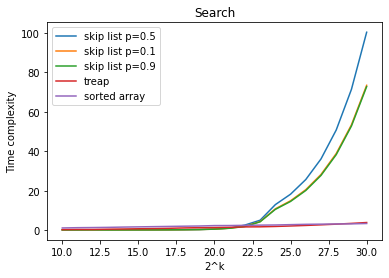

In [ ]:
search_df = pd.DataFrame({
    'skip list p=0.5':skip_search_result,
    'skip list p=0.1':skip_pnt_one_search_result,
    'skip list p=0.9':skip_pnt_nine_search_result,
    'treap':treap,
    'sorted array':sorted_arr
})
search_df.index = np.arange(10, len(search_df)+10)
search_df.plot(xlabel='2^k', ylabel='Time complexity', title='Search')

In [ ]:
search_df

,skip list p=0.5,skip list p=0.1,skip list p=0.9,treap,sorted array
10,0.247152,0.261130,0.250729,0.402913,1.228494
11,0.249880,0.256989,0.238554,0.486056,1.367199
12,0.244693,0.250876,0.283751,0.478297,1.433850
13,0.246732,0.260292,0.235350,0.604292,1.528236
14,0.244144,0.243573,0.245895,0.701697,1.671555
15,0.248887,0.261556,0.254325,0.817025,1.782244
16,0.268558,0.262187,0.260847,0.925523,1.894590
17,0.290618,0.287836,0.288795,1.047955,2.005426
18,0.326820,0.338823,0.342636,1.241530,2.120761
19,0.432731,0.445120,0.418152,1.383768,2.219414


In [ ]:
search_df.to_csv("search_result.dat",sep="|")

#3. 三種skip list在不同的n值時，平均每個data的additional copy個數

##Prob=0.5

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        while randint(1, 2) != 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):
        height = self.randomHeight()
        _node = Node(height, elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1
        return height

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    

def skip_list_copy_of_data(i):
  height_sum=0
  lst = SkipList()
  for k in range(2**i+1):
    height_sum += lst.insert(randint(1, 2**30+1))
  return height_sum, lst.maxHeight

In [ ]:
skip_avg_copy_result=[]
skip_max_height_result=[]
for i in range(10,31):
  total_height, max_height = skip_list_copy_of_data(i)
  # result = timeit.timeit(stmt='treap_insertion(i)', setup='from __main__ import treap_insertion,i', number=1)
  avg_copy = total_height/(2**i)
  skip_avg_copy_result.append(avg_copy)
  skip_max_height_result.append(max_height)
  print("Q3:",skip_avg_copy_result)
  print("Q4:",skip_max_height_result)

Q3: [2.044921875]
Q4: [12]
Q3: [2.044921875, 1.98828125]
Q4: [12, 15]
Q3: [2.044921875, 1.98828125, 1.97265625]
Q4: [12, 15, 16]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625]
Q4: [12, 15, 16, 20]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625]
Q4: [12, 15, 16, 20, 16]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625, 2.002471923828125]
Q4: [12, 15, 16, 20, 16, 17]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625, 2.002471923828125, 1.991455078125]
Q4: [12, 15, 16, 20, 16, 17, 16]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625, 2.002471923828125, 1.991455078125, 2.00177001953125]
Q4: [12, 15, 16, 20, 16, 17, 16, 18]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625, 2.002471923828125, 1.991455078125, 2.00177001953125, 1.9997901916503906]
Q4: [12, 15, 16, 20, 16, 17, 16, 18, 19]
Q3: [2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625

##Prob=0.1

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        #probability of head is 0.1 (1/10)
        while randint(1, 11) == 1:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        height = self.randomHeight()
        _node = Node(height, elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1
        return height

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_copy_of_data(i):
  height_sum=0
  lst = SkipList()
  for k in range(2**i+1):
    height_sum += lst.insert(randint(1, 2**30+1))
  return height_sum, lst.maxHeight

In [ ]:
skip_avg_copy_result=[]
skip_max_height_result=[]
for i in range(10,31):
  total_height, max_height = skip_list_copy_of_data(i)
  avg_copy = total_height/(2**i)
  skip_avg_copy_result.append(avg_copy)
  skip_max_height_result.append(max_height)
  print("Q3:",skip_avg_copy_result)
  print("Q4:",skip_max_height_result)

Q3: [1.09765625]
Q4: [4]
Q3: [1.09765625, 1.10107421875]
Q4: [4, 4]
Q3: [1.09765625, 1.10107421875, 1.099853515625]
Q4: [4, 4, 3]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125]
Q4: [4, 4, 3, 6]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125, 1.09783935546875]
Q4: [4, 4, 3, 6, 4]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125, 1.09783935546875, 1.09844970703125]
Q4: [4, 4, 3, 6, 4, 5]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125, 1.09783935546875, 1.09844970703125, 1.1003875732421875]
Q4: [4, 4, 3, 6, 4, 5, 7]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125, 1.09783935546875, 1.09844970703125, 1.1003875732421875, 1.1008834838867188]
Q4: [4, 4, 3, 6, 4, 5, 7, 6]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125, 1.09783935546875, 1.09844970703125, 1.1003875732421875, 1.1008834838867188, 1.1006088256835938]
Q4: [4, 4, 3, 6, 4, 5, 7, 6, 7]
Q3: [1.09765625, 1.10107421875, 1.099853515625, 1.0

KeyboardInterrupt: ignored

##Prob=0.9

In [ ]:
from random import randint, seed

class Node:  
    def __init__(self, height = 0, elem = None):
        self.elem = elem
        self.next = [None]*height

class SkipList:
    def __init__(self):
        self.head = Node()
        self.len = 0
        self.maxHeight = 0

    def __len__(self):
        return self.len

    def find(self, elem, update = None):
        if update == None:
            update = self.updateList(elem)
        if len(update) > 0:
            item = update[0].next[0]
            if item != None and item.elem == elem:
                return item
        return None
    
    def contains(self, elem, update = None):
        return self.find(elem, update) != None

    def randomHeight(self):
        height = 1
        #probability of head is 0.9 (9/10)
        while randint(1, 11) in [1,2,3,4,5,6,7,8,9]:
            height += 1
        return height

    def updateList(self, elem):
        update = [None]*self.maxHeight
        x = self.head
        for i in reversed(range(self.maxHeight)):
            while x.next[i] != None and x.next[i].elem < elem:
                x = x.next[i]
            update[i] = x
        return update
        
    def insert(self, elem):

        height = self.randomHeight()
        _node = Node(height, elem)

        self.maxHeight = max(self.maxHeight, len(_node.next))
        while len(self.head.next) < len(_node.next):
            self.head.next.append(None)

        update = self.updateList(elem)            
        if self.find(elem, update) == None:
            for i in range(len(_node.next)):
                _node.next[i] = update[i].next[i]
                update[i].next[i] = _node
            self.len += 1
        return height

    def remove(self, elem):

        update = self.updateList(elem)
        x = self.find(elem, update)
        if x != None:
            for i in reversed(range(len(x.next))):
                update[i].next[i] = x.next[i]
                if self.head.next[i] == None:
                    self.maxHeight -= 1
            self.len -= 1            
                
    # def printList(self):
    #     for i in range(len(self.head.next)-1, -1, -1):
    #         x = self.head
    #         while x.next[i] != None:
    #             print x.next[i].elem,
    #             x = x.next[i]
    #         print ''
    
# Driver to test above code
def skip_list_copy_of_data(i):
  height_sum=0
  lst = SkipList()
  for k in range(2**i+1):
    height_sum += lst.insert(randint(1, 2**30+1))
  return height_sum, lst.maxHeight

In [ ]:
skip_avg_copy_result=[]
skip_max_height_result=[]
for i in range(10,31):
  total_height, max_height = skip_list_copy_of_data(i)
  avg_copy = total_height/(2**i)
  skip_avg_copy_result.append(avg_copy)
  skip_max_height_result.append(max_height)
  print("Q3:",skip_avg_copy_result)
  print("Q4:",skip_max_height_result)

Q3: [5.361328125]
Q4: [34]
Q3: [5.361328125, 5.52685546875]
Q4: [34, 37]
Q3: [5.361328125, 5.52685546875, 5.483154296875]
Q4: [34, 37, 51]
Q3: [5.361328125, 5.52685546875, 5.483154296875, 5.54443359375]
Q4: [34, 37, 51, 49]
Q3: [5.361328125, 5.52685546875, 5.483154296875, 5.54443359375, 5.49041748046875]
Q4: [34, 37, 51, 49, 45]
Q3: [5.361328125, 5.52685546875, 5.483154296875, 5.54443359375, 5.49041748046875, 5.5069580078125]
Q4: [34, 37, 51, 49, 45, 53]
Q3: [5.361328125, 5.52685546875, 5.483154296875, 5.54443359375, 5.49041748046875, 5.5069580078125, 5.542022705078125]
Q4: [34, 37, 51, 49, 45, 53, 62]
Q3: [5.361328125, 5.52685546875, 5.483154296875, 5.54443359375, 5.49041748046875, 5.5069580078125, 5.542022705078125, 5.510101318359375]
Q4: [34, 37, 51, 49, 45, 53, 62, 58]
Q3: [5.361328125, 5.52685546875, 5.483154296875, 5.54443359375, 5.49041748046875, 5.5069580078125, 5.542022705078125, 5.510101318359375, 5.502494812011719]
Q4: [34, 37, 51, 49, 45, 53, 62, 58, 67]
Q3: [5.361328125, 5

##3. Result

In [ ]:
skip_num_copies=[2.044921875, 1.98828125, 1.97265625, 2.01806640625, 1.99371337890625, 2.002471923828125, 1.991455078125, 2.00177001953125, 1.9997901916503906, 2.0000839233398438, 1.9997472763061523, 1.9996047019958496, 1.9991464614868164, 2.000252366065979, 1.9994829297065735]
skip_pntone_num_copies=[1.09765625, 1.10107421875, 1.099853515625, 1.0987548828125, 1.09783935546875, 1.09844970703125, 1.1003875732421875, 1.1008834838867188, 1.1006088256835938, 1.1004581451416016, 1.0995550155639648, 1.0998611450195312, 1.0999431610107422, 1.1001684665679932, 1.0999978184700012]
skip_pntnine_num_copies=[5.361328125, 5.52685546875, 5.483154296875, 5.54443359375, 5.49041748046875, 5.5069580078125, 5.542022705078125, 5.510101318359375, 5.502494812011719, 5.499614715576172, 5.4984893798828125, 5.499314308166504, 5.504437208175659, 5.499379873275757, 5.498207211494446]



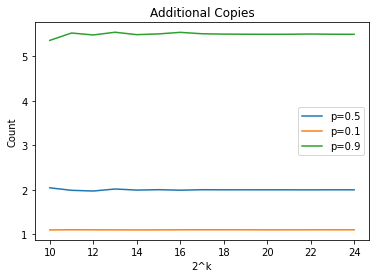

In [ ]:
copies_df = pd.DataFrame({
    'p=0.5':skip_num_copies,
    'p=0.1':skip_pntone_num_copies,
    'p=0.9':skip_pntnine_num_copies
})
copies_df.index = np.arange(10, len(copies_df)+10)
copies_df.plot(xlabel='2^k', ylabel='Count', title='Additional Copies')

In [ ]:
copies_df.to_csv("result_3.dat",sep="|")

#4. 三種skip list在不同的n值時的list個數

In [ ]:
skip_max_height = [12, 15, 16, 20, 16, 17, 16, 18, 19, 22, 21, 20, 21, 23, 25]
skip_pntone_max_height = [4, 4, 3, 6, 4, 5, 7, 6, 7, 6, 8, 7, 7, 8, 7]
skip_pntnine_max_height = [34, 37, 51, 49, 45, 53, 62, 58, 67, 59, 80, 77, 85, 74, 84]


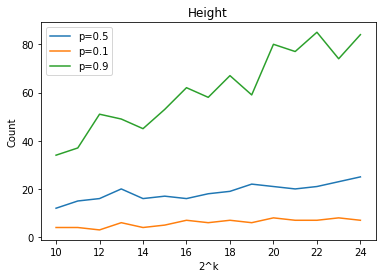

In [ ]:
height_df = pd.DataFrame({
    'p=0.5':skip_max_height,
    'p=0.1':skip_pntone_max_height,
    'p=0.9':skip_pntnine_max_height
})
height_df.index = np.arange(10, len(height_df)+10)
height_df.plot(xlabel='2^k', ylabel='Count', title='Height')

In [ ]:
height_df.to_csv("result_4.dat",sep="|")